
#Análise estatística dos dados sobre COVID
---
- ANNY CAROLINA - RM:98295
- DEBORA AMARAL - RM:550412
- LEVY JUNIOR - RM:98655
- LÍVIA NAMBA - RM:97819
- LUANA CABEZAOLIAS - RM:99320


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# Estatísticas descritivas 2019

In [66]:
obitos19_df = pd.read_csv('obitos-2019.csv') # Define o DataFrame lendo o CSV
obitos19_df

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,17
2,AC,OUTRAS,HOSPITAL,< 9,F,48
3,AC,OUTRAS,HOSPITAL,< 9,M,81
4,AC,OUTRAS,IGNORADO,< 9,M,1
...,...,...,...,...,...,...
12769,TO,PNEUMONIA,HOSPITAL,N/I,F,1
12770,TO,PNEUMONIA,HOSPITAL,N/I,M,1
12771,TO,SEPTICEMIA,DOMICILIO,N/I,F,3
12772,TO,SEPTICEMIA,HOSPITAL,N/I,F,1


In [67]:
# Estatísticas descritivas gerais
obitos19_df.describe()

,total
count,12774.000000
mean,95.371693
std,441.750319
min,1.000000
25%,2.000000
50%,6.000000
75%,34.000000
max,12872.000000


In [68]:
# Estatísticas descritivas para a coluna numérica 'uf'
obitos19_df["uf"].describe()

count     12774
unique       27
top          SP
freq        813
Name: uf, dtype: object

In [69]:
# Estatísticas descritivas para a coluna numérica 'tipo_doenca'
obitos19_df["tipo_doenca"].describe()

count      12774
unique         7
top       OUTRAS
freq        3962
Name: tipo_doenca, dtype: object

In [70]:
# Estatísticas descritivas para a coluna numérica 'local_obito'
obitos19_df["local_obito"].describe()

count        12774
unique           9
top       HOSPITAL
freq          3570
Name: local_obito, dtype: object

In [71]:
# Estatísticas descritivas para a coluna numérica 'faixa_etaria'
obitos19_df["faixa_etaria"].describe()

count       12774
unique         12
top       70 - 79
freq         1363
Name: faixa_etaria, dtype: object

In [72]:
# Estatísticas descritivas para a coluna numérica 'sexo'
obitos19_df["sexo"].describe()

count     12768
unique        3
top           M
freq       6433
Name: sexo, dtype: object

In [73]:
# Estatísticas descritivas para a coluna numérica 'total'
obitos19_df["total"].describe()

count    12774.000000
mean        95.371693
std        441.750319
min          1.000000
25%          2.000000
50%          6.000000
75%         34.000000
max      12872.000000
Name: total, dtype: float64

# Gráficos 2019

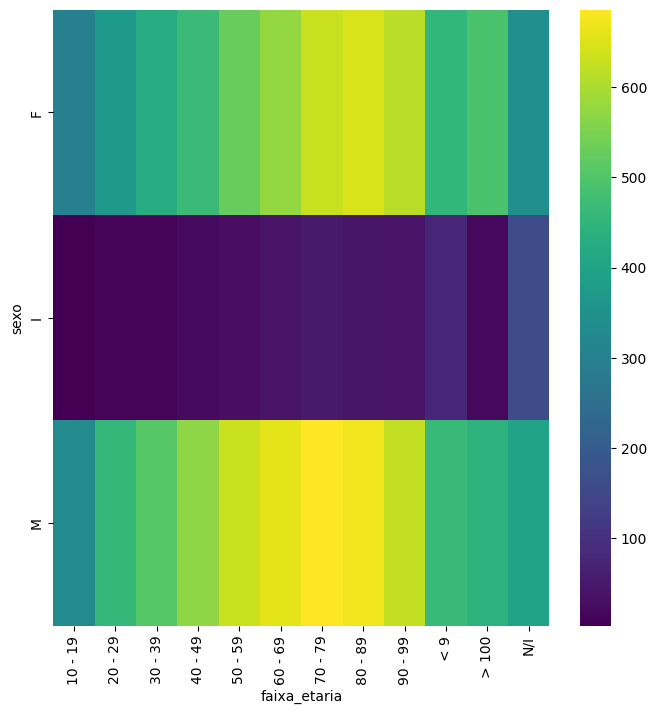

In [74]:
# @title faixa_etaria vs sexo

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sexo'].value_counts()
    for x_label, grp in obitos19_df.groupby('faixa_etaria')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('faixa_etaria')
_ = plt.ylabel('sexo')


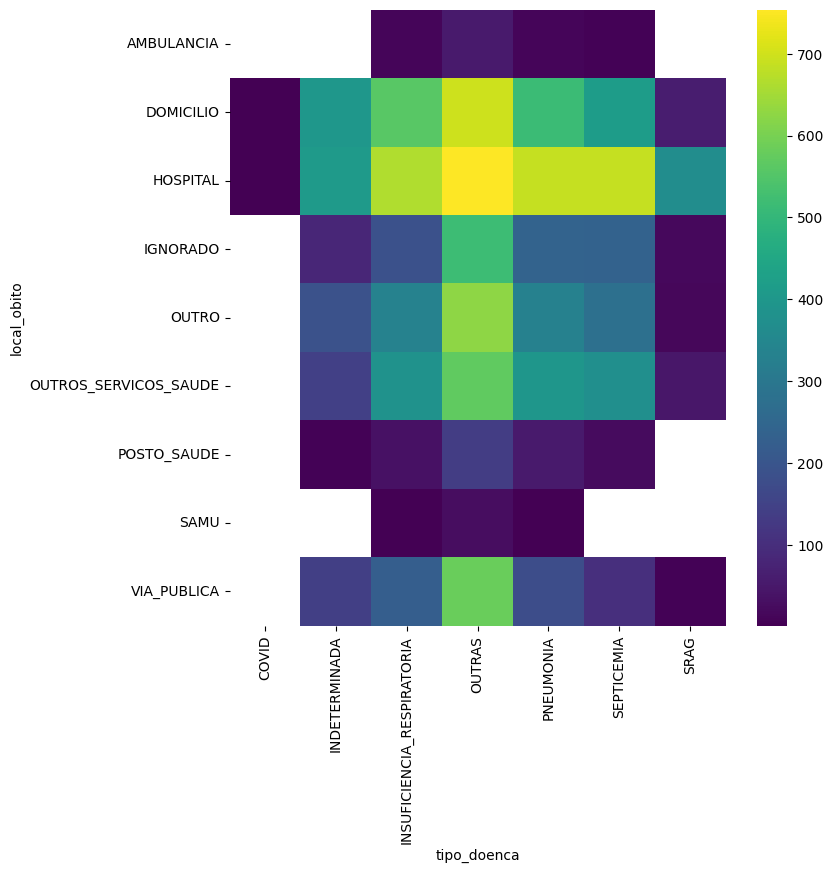

In [75]:
# @title tipo_doenca vs local_obito

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['local_obito'].value_counts()
    for x_label, grp in obitos19_df.groupby('tipo_doenca')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_doenca')
_ = plt.ylabel('local_obito')

# Testes de hipótese 2019

In [76]:
# Carregar os dados do arquivo CSV
obitos_19 = 'obitos-2019.csv'
data = pd.read_csv(obitos_19)


In [77]:
#Hipótese 1: Diferença significativa no número de óbitos entre diferentes faixas etárias
# Agrupar os dados por faixa etária e somar o total de óbitos
faixa_etaria_totals = data.groupby('faixa_etaria')['total'].sum()

# Criar tabela de contingência para o teste de chi2
contingency_faixa_etaria = pd.crosstab(data['faixa_etaria'], data['total'])

# Realizar o teste de chi2
chi2_faixa_etaria, p_faixa_etaria, dof_faixa_etaria, ex_faixa_etaria = chi2_contingency(contingency_faixa_etaria)

# Exibir os resultados
print(f"Chi2: {chi2_faixa_etaria}, p-valor: {p_faixa_etaria}")


Chi2: 8812.904380721131, p-valor: 0.9999999999866925


In [78]:
#Hipótese 2: Diferença significativa no número de óbitos entre homens e mulheres
# Agrupar os dados por sexo e somar o total de óbitos, removendo valores nulos
sexo_totals = data.dropna(subset=['sexo']).groupby('sexo')['total'].sum()

# Criar tabela de contingência para o teste de chi2
contingency_sexo = pd.crosstab(data['sexo'], data['total'])

# Realizar o teste de chi2
chi2_sexo, p_sexo, dof_sexo, ex_sexo = chi2_contingency(contingency_sexo)

# Exibir os resultados
print(f"Chi2: {chi2_sexo}, p-valor: {p_sexo}")


Chi2: 1355.926250496494, p-valor: 0.9999999999999702


In [79]:
#Hipótese 3: O local de óbito influencia significativamente o número de óbitos
# Agrupar os dados por local de óbito e somar o total de óbitos
local_obito_totals = data.groupby('local_obito')['total'].sum()

# Criar tabela de contingência para o teste de chi2
contingency_local_obito = pd.crosstab(data['local_obito'], data['total'])

# Realizar o teste de chi2
chi2_local_obito, p_local_obito, dof_local_obito, ex_local_obito = chi2_contingency(contingency_local_obito)

# Exibir os resultados
print(f"Chi2: {chi2_local_obito}, p-valor: {p_local_obito}")


Chi2: 4896.847114060893, p-valor: 1.0


# Estatísticas descritivas 2020

In [80]:
obitos20_df = pd.read_csv('obitos-2020.csv') # Define o DataFrame lendo o CSV
obitos20_df

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,10
2,AC,OUTRAS,HOSPITAL,< 9,F,69
3,AC,OUTRAS,HOSPITAL,< 9,I,1
4,AC,OUTRAS,HOSPITAL,< 9,M,68
...,...,...,...,...,...,...
15530,TO,PNEUMONIA,DOMICILIO,N/I,I,1
15531,TO,PNEUMONIA,HOSPITAL,N/I,F,1
15532,TO,PNEUMONIA,HOSPITAL,N/I,M,3
15533,TO,SEPTICEMIA,HOSPITAL,N/I,I,1


In [81]:
# Estatísticas descritivas gerais
obitos20_df.describe()

,total
count,15535.000000
mean,91.415449
std,413.714486
min,1.000000
25%,2.000000
50%,6.000000
75%,33.000000
max,12436.000000


In [82]:
# Estatísticas descritivas para a coluna numérica 'uf'
obitos20_df["uf"].describe()

count     15535
unique       27
top          SP
freq        959
Name: uf, dtype: object

In [83]:
# Estatísticas descritivas para a coluna numérica 'tipo_doenca'
obitos20_df["tipo_doenca"].describe()

count      15535
unique         7
top       OUTRAS
freq        3963
Name: tipo_doenca, dtype: object

In [84]:
# Estatísticas descritivas para a coluna numérica 'local_obito'
obitos20_df["local_obito"].describe()

count        15535
unique           9
top       HOSPITAL
freq          4354
Name: local_obito, dtype: object

In [85]:
# Estatísticas descritivas para a coluna numérica 'faixa_etaria'
obitos20_df["faixa_etaria"].describe()

count       15535
unique         12
top       70 - 79
freq         1741
Name: faixa_etaria, dtype: object

In [86]:
# Estatísticas descritivas para a coluna numérica 'sexo'
obitos20_df["sexo"].describe()

count     15534
unique        3
top           M
freq       7873
Name: sexo, dtype: object

In [87]:
# Estatísticas descritivas para a coluna numérica 'total'
obitos20_df["total"].describe()

count    15535.000000
mean        91.415449
std        413.714486
min          1.000000
25%          2.000000
50%          6.000000
75%         33.000000
max      12436.000000
Name: total, dtype: float64

# Gráficos 2020

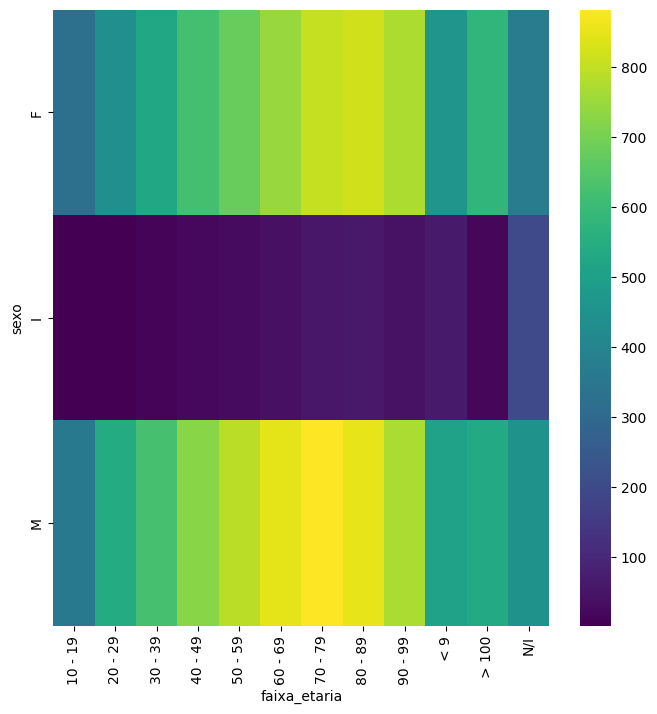

In [88]:
# @title faixa_etaria vs sexo

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sexo'].value_counts()
    for x_label, grp in obitos20_df.groupby('faixa_etaria')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('faixa_etaria')
_ = plt.ylabel('sexo')


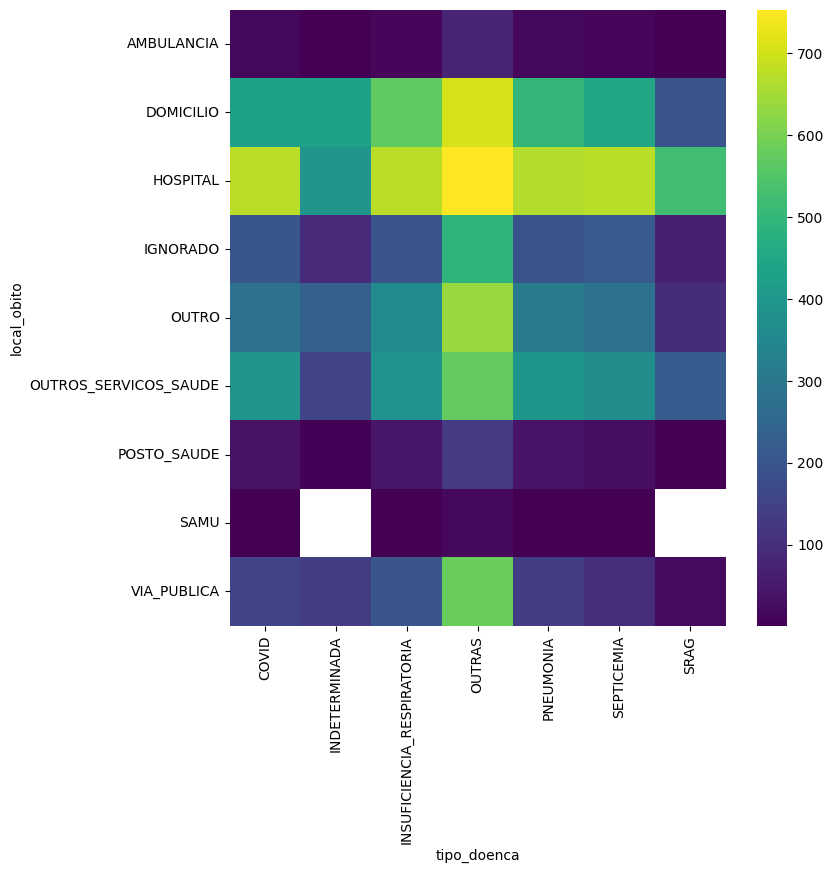

In [89]:
# @title tipo_doenca vs local_obito

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['local_obito'].value_counts()
    for x_label, grp in obitos20_df.groupby('tipo_doenca')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_doenca')
_ = plt.ylabel('local_obito')

# Testes de hipótese 2020

In [96]:
# Carregar os dados
obitos_20 = 'obitos-2020.csv'
data = pd.read_csv(obitos_20)


In [97]:
#Hipótese 1: Local de Óbito (Hospital vs Domicílio)
# Filtrar os dados
hospital_obitos = data[data['local_obito'] == 'HOSPITAL']['total']
domicilio_obitos = data[data['local_obito'] == 'DOMICILIO']['total']

# Teste t para amostras independentes
t_stat1, p_value1 = stats.ttest_ind(hospital_obitos, domicilio_obitos, equal_var=False)

print(f"Estatística t: {t_stat1}")
print(f"Valor p: {p_value1}")


Estatística t: 11.657369836600548
Valor p: 4.200909181131031e-31


In [98]:
#Hipótese 2: Hipótese 2: Sexo (Homens vs Mulheres)
# Filtrar os dados
homens_obitos = data[data['sexo'] == 'M']['total']
mulheres_obitos = data[data['sexo'] == 'F']['total']

# Teste t para amostras independentes
t_stat2, p_value2 = stats.ttest_ind(homens_obitos, mulheres_obitos, equal_var=False)

print(f"Estatística t: {t_stat2}")
print(f"Valor p: {p_value2}")


Estatística t: 1.0457256028799058
Valor p: 0.29570460142379423


In [99]:
#Hipótese 3: Faixa Etária
# Agrupar os dados por faixa etária
faixa_etaria_groups = data.groupby('faixa_etaria')['total'].apply(list)

# ANOVA de uma via
f_stat3, p_value3 = stats.f_oneway(*faixa_etaria_groups)

print(f"Estatística F: {f_stat3}")
print(f"Valor p: {p_value3}")



Estatística F: 33.01087567065818
Valor p: 2.956372029957068e-70


# Estatísticas descritivas 2021

In [100]:
obitos21_df = pd.read_csv('obitos-2021.csv') # Define o DataFrame lendo o CSV
obitos21_df

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,11
1,AC,OUTRAS,DOMICILIO,< 9,M,21
2,AC,OUTRAS,HOSPITAL,< 9,F,67
3,AC,OUTRAS,HOSPITAL,< 9,I,4
4,AC,OUTRAS,HOSPITAL,< 9,M,60
...,...,...,...,...,...,...
15670,TO,PNEUMONIA,HOSPITAL,N/I,F,5
15671,TO,PNEUMONIA,HOSPITAL,N/I,I,2
15672,TO,PNEUMONIA,HOSPITAL,N/I,M,2
15673,TO,SEPTICEMIA,HOSPITAL,N/I,F,2


In [101]:
# Estatísticas descritivas gerais
obitos21_df.describe()

,total
count,15675.000000
mean,107.459139
std,508.823651
min,1.000000
25%,2.000000
50%,6.000000
75%,36.000000
max,14166.000000


In [102]:
# Estatísticas descritivas para a coluna numérica 'uf'
obitos21_df["uf"].describe()

count     15675
unique       27
top          SP
freq        981
Name: uf, dtype: object

In [103]:
# Estatísticas descritivas para a coluna numérica 'tipo_doenca'
obitos21_df["tipo_doenca"].describe()

count      15675
unique         7
top       OUTRAS
freq        3901
Name: tipo_doenca, dtype: object

In [104]:
# Estatísticas descritivas para a coluna numérica 'local_obito'
obitos21_df["local_obito"].describe()

count        15675
unique           9
top       HOSPITAL
freq          4336
Name: local_obito, dtype: object

In [105]:
# Estatísticas descritivas para a coluna numérica 'faixa_etaria'
obitos21_df["faixa_etaria"].describe()

count       15675
unique         12
top       70 - 79
freq         1753
Name: faixa_etaria, dtype: object

In [106]:
# Estatísticas descritivas para a coluna numérica 'sexo'
obitos21_df["sexo"].describe()

count     15672
unique        3
top           M
freq       7871
Name: sexo, dtype: object

In [107]:
# Estatísticas descritivas para a coluna numérica 'total'
obitos21_df["total"].describe()

count    15675.000000
mean       107.459139
std        508.823651
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      14166.000000
Name: total, dtype: float64

# Gráficos 2021

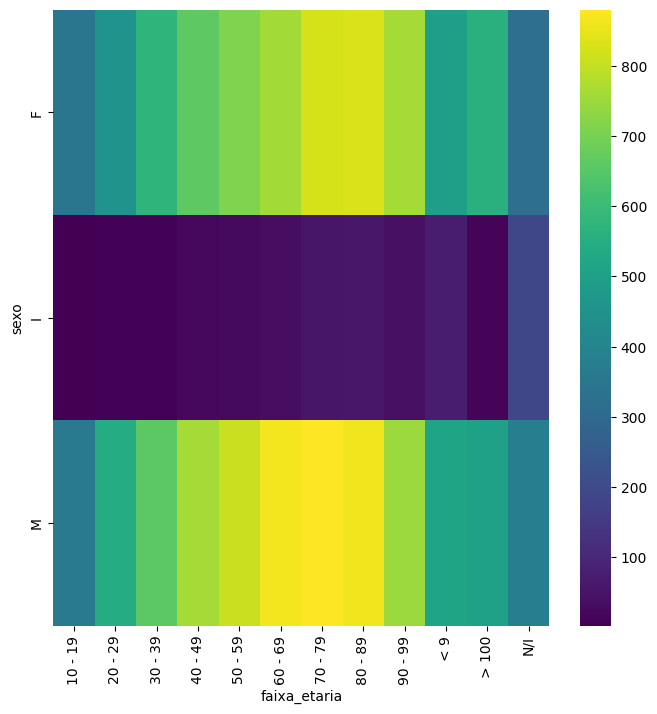

In [108]:
# @title faixa_etaria vs sexo

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sexo'].value_counts()
    for x_label, grp in obitos21_df.groupby('faixa_etaria')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('faixa_etaria')
_ = plt.ylabel('sexo')


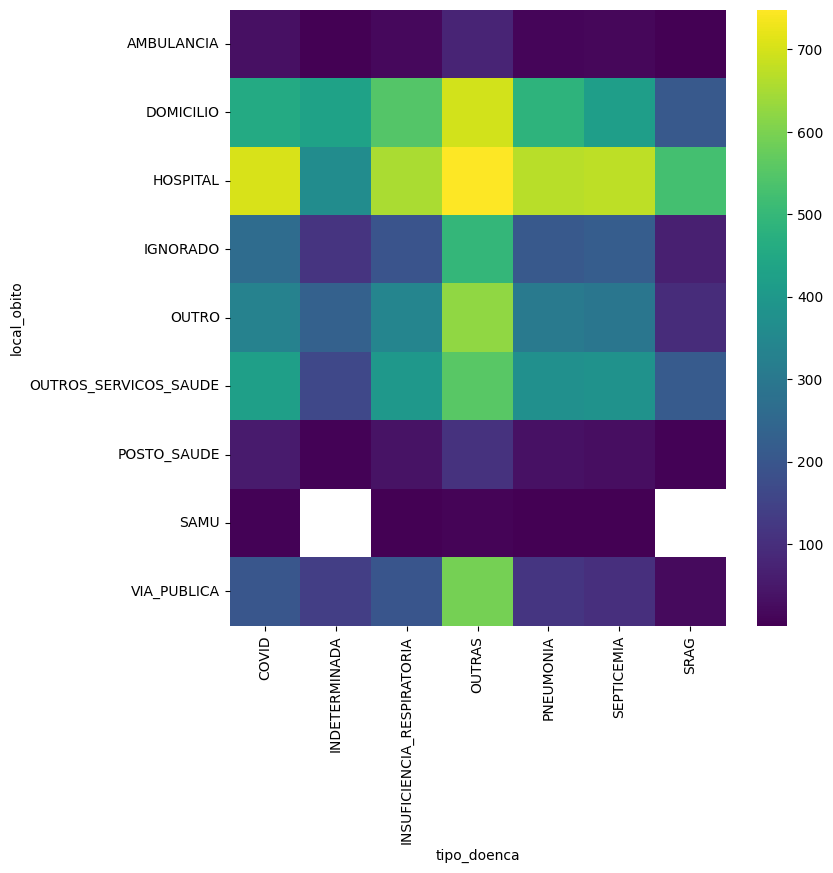

In [109]:
# @title tipo_doenca vs local_obito

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['local_obito'].value_counts()
    for x_label, grp in obitos21_df.groupby('tipo_doenca')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_doenca')
_ = plt.ylabel('local_obito')

# Testes de hipótese 2021

In [110]:
# Carregar os dados
obitos_21 = 'obitos-2021.csv'
data = pd.read_csv(obitos_21)


In [111]:
#Hipótese 1: A média de óbitos entre os sexos é diferente
# Filtrando os dados por sexo
sex_female = data[data['sexo'] == 'F']['total']
sex_male = data[data['sexo'] == 'M']['total']

# Teste t de Student para médias independentes
t_sex, p_sex = stats.ttest_ind(sex_female, sex_male, equal_var=False)

print(f"t-statistic: {t_sex}, p-value: {p_sex}")

t-statistic: -1.0596423200147924, p-value: 0.2893242546410569


In [112]:
#Hipótese 2: O número de óbitos varia significativamente entre diferentes faixas etárias
# Agrupando os dados por faixa etária
ages = [data[data['faixa_etaria'] == age]['total'] for age in data['faixa_etaria'].unique()]

# Teste ANOVA para médias entre diferentes faixas etárias
f_age, p_age = stats.f_oneway(*ages)

print(f"F-statistic: {f_age}, p-value: {p_age}")

F-statistic: 29.599105993137535, p-value: 1.6978796287979073e-62


In [113]:
#Hipótese 3: O número de óbitos difere significativamente entre os locais de óbito (domicílio vs. hospital)
# Filtrando os dados para os locais de óbito "DOMICILIO" e "HOSPITAL"
local_domicilio = data[data['local_obito'] == 'DOMICILIO']['total']
local_hospital = data[data['local_obito'] == 'HOSPITAL']['total']

# Teste t de Student para médias independentes
t_local, p_local = stats.ttest_ind(local_domicilio, local_hospital, equal_var=False)

print(f"t-statistic: {t_local}, p-value: {p_local}")



t-statistic: -12.782191958170868, p-value: 6.078179086413927e-37


# Estatísticas descritivas 2022

In [114]:
obitos22_df = pd.read_csv('obitos-2022.csv') # Define o DataFrame lendo o CSV
obitos22_df

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,11
1,AC,OUTRAS,DOMICILIO,< 9,I,1
2,AC,OUTRAS,DOMICILIO,< 9,M,19
3,AC,OUTRAS,HOSPITAL,< 9,F,54
4,AC,OUTRAS,HOSPITAL,< 9,I,6
...,...,...,...,...,...,...
15012,TO,SEPTICEMIA,DOMICILIO,N/I,M,1
15013,TO,SEPTICEMIA,HOSPITAL,N/I,F,2
15014,TO,SEPTICEMIA,HOSPITAL,N/I,I,1
15015,TO,SEPTICEMIA,HOSPITAL,N/I,M,2


In [115]:
# Estatísticas descritivas gerais
obitos22_df.describe()

,total
count,15017.000000
mean,93.337617
std,440.756957
min,1.000000
25%,2.000000
50%,6.000000
75%,33.000000
max,13729.000000


In [116]:
# Estatísticas descritivas para a coluna numérica 'uf'
obitos22_df["uf"].describe()

count     15017
unique       27
top          SP
freq        920
Name: uf, dtype: object

In [117]:
# Estatísticas descritivas para a coluna numérica 'tipo_doenca'
obitos22_df["tipo_doenca"].describe()

count      15017
unique         7
top       OUTRAS
freq        3863
Name: tipo_doenca, dtype: object

In [118]:
# Estatísticas descritivas para a coluna numérica 'local_obito'
obitos22_df["local_obito"].describe()

count        15017
unique           9
top       HOSPITAL
freq          4288
Name: local_obito, dtype: object

In [119]:
# Estatísticas descritivas para a coluna numérica 'faixa_etaria'
obitos22_df["faixa_etaria"].describe()

count       15017
unique         12
top       70 - 79
freq         1687
Name: faixa_etaria, dtype: object

In [120]:
# Estatísticas descritivas para a coluna numérica 'sexo'
obitos22_df["sexo"].describe()

count     15014
unique        3
top           M
freq       7602
Name: sexo, dtype: object

In [121]:
# Estatísticas descritivas para a coluna numérica 'total'
obitos22_df["total"].describe()

count    15017.000000
mean        93.337617
std        440.756957
min          1.000000
25%          2.000000
50%          6.000000
75%         33.000000
max      13729.000000
Name: total, dtype: float64

# Gráficos 2022

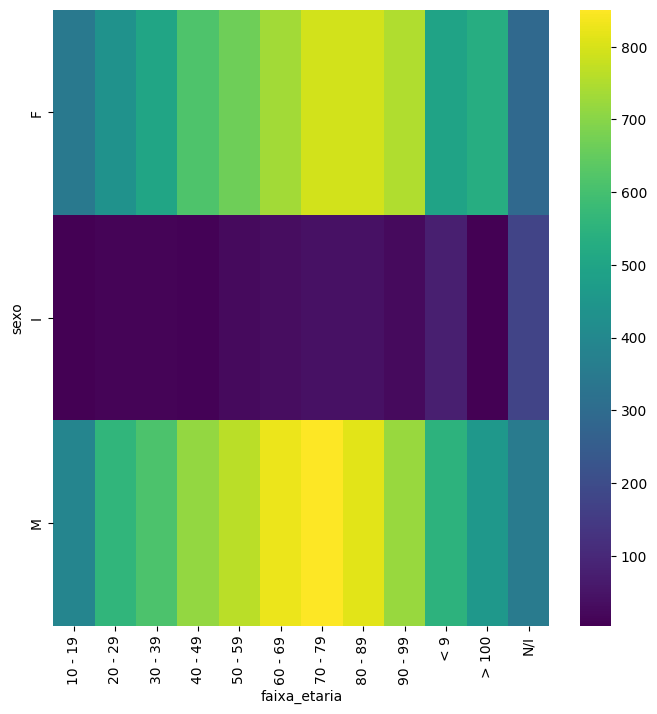

In [122]:
# @title faixa_etaria vs sexo

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sexo'].value_counts()
    for x_label, grp in obitos22_df.groupby('faixa_etaria')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('faixa_etaria')
_ = plt.ylabel('sexo')


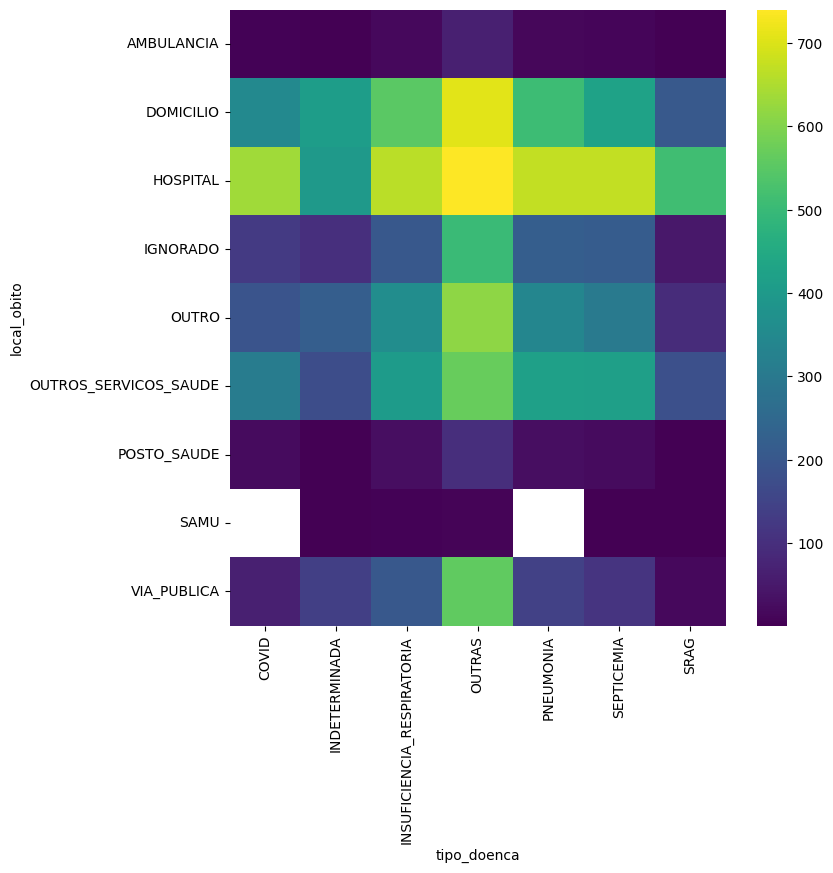

In [123]:
# @title tipo_doenca vs local_obito

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['local_obito'].value_counts()
    for x_label, grp in obitos22_df.groupby('tipo_doenca')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_doenca')
_ = plt.ylabel('local_obito')

# Testes de hipótese 2022

In [139]:
# Carregar os dados
obitos_22 = 'obitos-2022.csv'
data = pd.read_csv(obitos_22)


In [140]:
#Hipótese 1: Teste de diferença de médias entre dois grupos (sexo):
# Removendo linhas com valores nulos na coluna 'sexo'
data_cleaned = data.dropna(subset=['sexo'])

# Separando os dados por sexo
group_male = data_cleaned[data_cleaned['sexo'] == 'M']['total']
group_female = data_cleaned[data_cleaned['sexo'] == 'F']['total']

# Realizando o teste t de Student
t_stat_sex, p_value_sex = stats.ttest_ind(group_male, group_female, equal_var=False)

print(f"Teste t de diferença de médias entre sexos:\nEstatística t: {t_stat_sex}\nValor p: {p_value_sex}")

Teste t de diferença de médias entre sexos:
Estatística t: 0.3545580749902306
Valor p: 0.7229258520819195


In [141]:
#Hipótese 2: Teste de diferença de médias entre faixas etárias:
# Agrupando os dados por faixa etária e calculando as médias
age_groups = data_cleaned.groupby('faixa_etaria')['total'].mean()

# Realizando o teste ANOVA
f_stat_age, p_value_age = stats.f_oneway(*[group['total'] for name, group in data_cleaned.groupby('faixa_etaria')])

print(f"Teste ANOVA de diferença de médias entre faixas etárias:\nEstatística F: {f_stat_age}\nValor p: {p_value_age}")


Teste ANOVA de diferença de médias entre faixas etárias:
Estatística F: 30.30791464547004
Valor p: 4.4457742128410336e-64


In [142]:
#Hipótese 3: Teste de associação entre tipo de doença e local do óbito:
# Criando tabela de contingência
contingency_doenca_local = pd.crosstab(data_cleaned['tipo_doenca'], data_cleaned['local_obito'])

# Realizando o teste do qui-quadrado
chi2_doenca_local, p_value_doenca_local, _, _ = stats.chi2_contingency(contingency_doenca_local)

print(f"Teste do qui-quadrado de associação entre tipo de doença e local do óbito:\nEstatística chi-quadrado: {chi2_doenca_local}\nValor p: {p_value_doenca_local}")




Teste do qui-quadrado de associação entre tipo de doença e local do óbito:
Estatística chi-quadrado: 1017.2405170965158
Valor p: 9.196924781490019e-182


In [143]:
#Hipótese 3: Teste de associação entre UF e tipo de doença
# Criando tabela de contingência
contingency_uf_doenca = pd.crosstab(data_cleaned['uf'], data_cleaned['tipo_doenca'])

# Realizando o teste do qui-quadrado
chi2_uf_doenca, p_value_uf_doenca, _, _ = stats.chi2_contingency(contingency_uf_doenca)

print(f"Teste do qui-quadrado de associação entre UF e tipo de doença:\nEstatística chi-quadrado: {chi2_uf_doenca}\nValor p: {p_value_uf_doenca}")



Teste do qui-quadrado de associação entre UF e tipo de doença:
Estatística chi-quadrado: 368.30551429242666
Valor p: 3.2556725126105846e-19


# Estatísticas descritivas 2023

In [164]:
obitos23_df = pd.read_csv('obitos-2023.csv') # Define o DataFrame lendo o CSV
obitos23_df

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,13
1,AC,OUTRAS,DOMICILIO,< 9,I,1
2,AC,OUTRAS,DOMICILIO,< 9,M,17
3,AC,OUTRAS,HOSPITAL,< 9,F,63
4,AC,OUTRAS,HOSPITAL,< 9,I,1
...,...,...,...,...,...,...
13869,TO,PNEUMONIA,HOSPITAL,N/I,M,69
13870,TO,PNEUMONIA,OUTROS_SERVICOS_SAUDE,N/I,M,1
13871,TO,SEPTICEMIA,HOSPITAL,N/I,F,41
13872,TO,SEPTICEMIA,HOSPITAL,N/I,I,2


In [165]:
# Estatísticas descritivas gerais
obitos23_df.describe()

,total
count,13874.000000
mean,95.306184
std,450.017633
min,1.000000
25%,2.000000
50%,6.000000
75%,33.000000
max,13650.000000


In [166]:
# Estatísticas descritivas para a coluna numérica 'uf'
obitos23_df["uf"].describe()

count     13874
unique       27
top          SP
freq        870
Name: uf, dtype: object

In [167]:
# Estatísticas descritivas para a coluna numérica 'tipo_doenca'
obitos23_df["tipo_doenca"].describe()

count      13874
unique         7
top       OUTRAS
freq        3775
Name: tipo_doenca, dtype: object

In [168]:
# Estatísticas descritivas para a coluna numérica 'local_obito'
obitos23_df["local_obito"].describe()

count        13874
unique           9
top       HOSPITAL
freq          4059
Name: local_obito, dtype: object

In [169]:
# Estatísticas descritivas para a coluna numérica 'faixa_etaria'
obitos23_df["faixa_etaria"].describe()

count       13874
unique         12
top       80 - 89
freq         1553
Name: faixa_etaria, dtype: object

In [170]:
# Estatísticas descritivas para a coluna numérica 'sexo'
obitos23_df["sexo"].describe()

count     13874
unique        3
top           M
freq       7020
Name: sexo, dtype: object

In [171]:
# Estatísticas descritivas para a coluna numérica 'total'
obitos23_df["total"].describe()

count    13874.000000
mean        95.306184
std        450.017633
min          1.000000
25%          2.000000
50%          6.000000
75%         33.000000
max      13650.000000
Name: total, dtype: float64

# Gráficos 2023

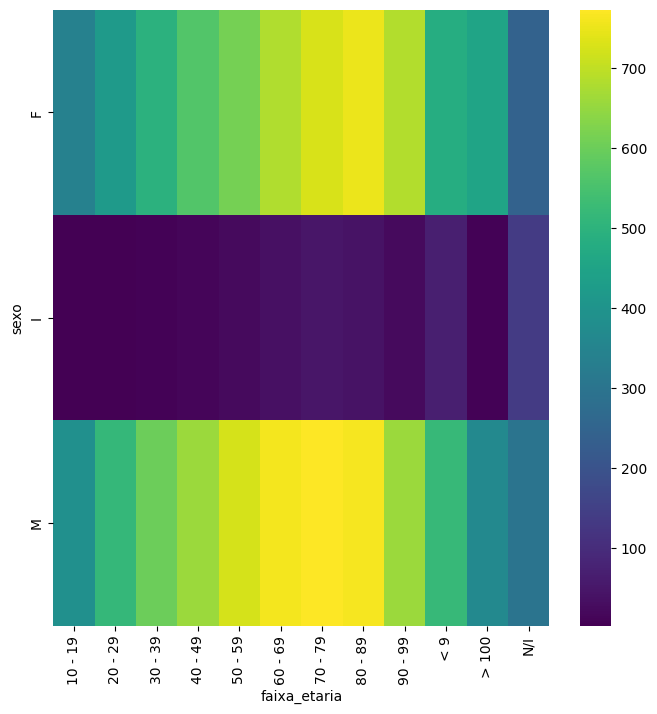

In [162]:
# @title faixa_etaria vs sexo

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sexo'].value_counts()
    for x_label, grp in obitos23_df.groupby('faixa_etaria')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('faixa_etaria')
_ = plt.ylabel('sexo')


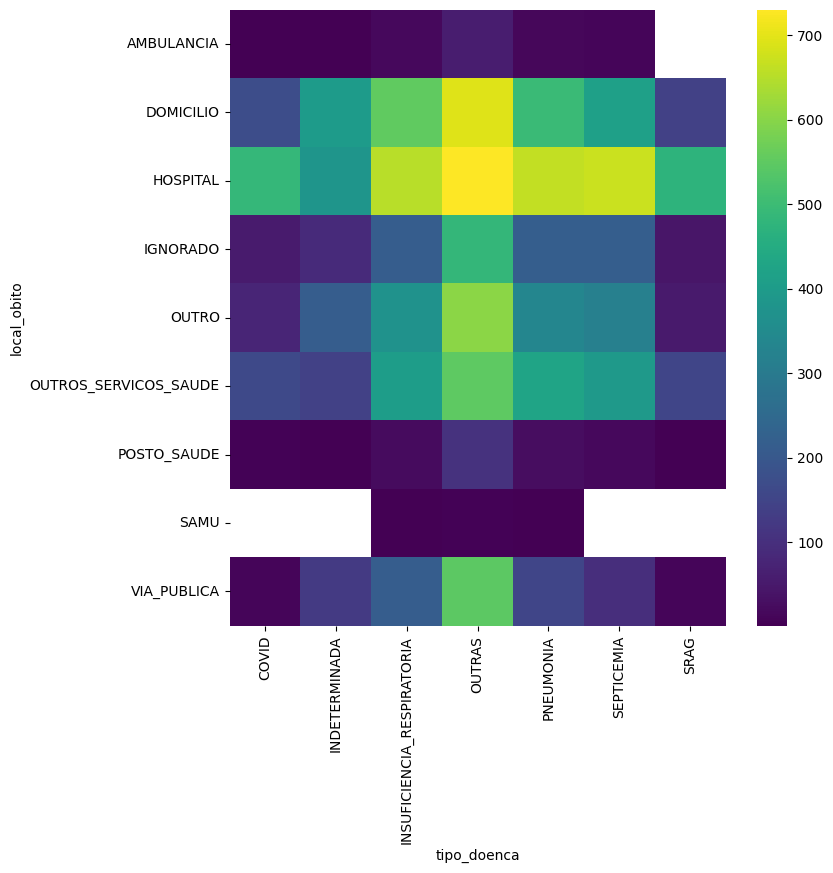

In [163]:
# @title tipo_doenca vs local_obito

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['local_obito'].value_counts()
    for x_label, grp in obitos23_df.groupby('tipo_doenca')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_doenca')
_ = plt.ylabel('local_obito')

# Testes de hipótese 2023

In [152]:
# Carregar os dados
obitos_23 = 'obitos-2023.csv'
data = pd.read_csv(obitos_23)


In [153]:
#Hipótese 1: Diferença no número de óbitos entre homens e mulheres
# Filtrar os dados para homens e mulheres
male_deaths = data[data['sexo'] == 'M']['total']
female_deaths = data[data['sexo'] == 'F']['total']

# Realizar o teste t
t_stat_sex, p_val_sex = stats.ttest_ind(male_deaths, female_deaths, equal_var=False)

# Resultados
print(f"Estatística t: {t_stat_sex}, Valor p: {p_val_sex}")

Estatística t: 0.4040240776188532, Valor p: 0.6862014548400879


In [154]:
#Hipótese 2: Diferença no número de óbitos entre diferentes faixas etárias
# Agrupar os dados por faixas etárias
age_groups = data['faixa_etaria'].unique()
age_group_deaths = [data[data['faixa_etaria'] == age]['total'] for age in age_groups]

# Realizar o teste ANOVA
f_stat_age, p_val_age = stats.f_oneway(*age_group_deaths)

# Resultados
print(f"Estatística F: {f_stat_age}, Valor p: {p_val_age}")


Estatística F: 27.317638009938698, Valor p: 3.1223871846530984e-57


In [155]:
#Hipótese 3: Diferença no número de óbitos em diferentes locais (domicílio vs. hospital)
# Filtrar os dados para domicílio e hospital
domicilio_deaths = data[data['local_obito'] == 'DOMICILIO']['total']
hospital_deaths = data[data['local_obito'] == 'HOSPITAL']['total']

# Realizar o teste t
t_stat_location, p_val_location = stats.ttest_ind(domicilio_deaths, hospital_deaths, equal_var=False)

# Resultados
print(f"Estatística t: {t_stat_location}, Valor p: {p_val_location}")


Estatística t: -10.14142823159848, Valor p: 5.6255761197246475e-24


# Estatísticas descritivas 2024

In [144]:
obitos24_df = pd.read_csv('obitos-2024.csv') # Define o DataFrame lendo o CSV
obitos24_df

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total,ano
0,"AC,OUTRAS,DOMICILIO,""< 9"",F,3",NaN,NaN,NaN,NaN,NaN,NaN
1,"AC,OUTRAS,DOMICILIO,""< 9"",M,6",NaN,NaN,NaN,NaN,NaN,NaN
2,"AC,OUTRAS,HOSPITAL,""< 9"",F,18",NaN,NaN,NaN,NaN,NaN,NaN
3,"AC,OUTRAS,HOSPITAL,""< 9"",I,1",NaN,NaN,NaN,NaN,NaN,NaN
4,"AC,OUTRAS,HOSPITAL,""< 9"",M,22",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
10256,TO,PNEUMONIA,VIA_PUBLICA,N/I,F,1.0,NaN
10257,TO,SEPTICEMIA,HOSPITAL,N/I,F,7.0,NaN
10258,TO,SEPTICEMIA,HOSPITAL,N/I,I,1.0,NaN
10259,TO,SEPTICEMIA,HOSPITAL,N/I,M,18.0,NaN


In [145]:
# Estatísticas descritivas gerais
obitos24_df.describe()

,total,ano
count,413.000000,0.0
mean,11.309927,NaN
std,30.694799,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,2.000000,NaN
75%,7.000000,NaN
max,306.000000,NaN


In [146]:
# Estatísticas descritivas para a coluna numérica 'uf'
obitos24_df["uf"].describe()

count     10261
unique     9875
top          SP
freq         34
Name: uf, dtype: object

In [147]:
# Estatísticas descritivas para a coluna numérica 'tipo_doenca'
obitos24_df["tipo_doenca"].describe()

count        413
unique         7
top       OUTRAS
freq         240
Name: tipo_doenca, dtype: object

In [148]:
# Estatísticas descritivas para a coluna numérica 'local_obito'
obitos24_df["local_obito"].describe()

count          413
unique           7
top       HOSPITAL
freq           182
Name: local_obito, dtype: object

In [149]:
# Estatísticas descritivas para a coluna numérica 'faixa_etaria'
obitos24_df["faixa_etaria"].describe()

count     413
unique      1
top       N/I
freq      413
Name: faixa_etaria, dtype: object

In [150]:
# Estatísticas descritivas para a coluna numérica 'sexo'
obitos24_df["sexo"].describe()

count     413
unique      3
top         M
freq      186
Name: sexo, dtype: object

In [151]:
# Estatísticas descritivas para a coluna numérica 'total'
obitos24_df["total"].describe()

count    413.000000
mean      11.309927
std       30.694799
min        1.000000
25%        1.000000
50%        2.000000
75%        7.000000
max      306.000000
Name: total, dtype: float64

# Gráficos 2024

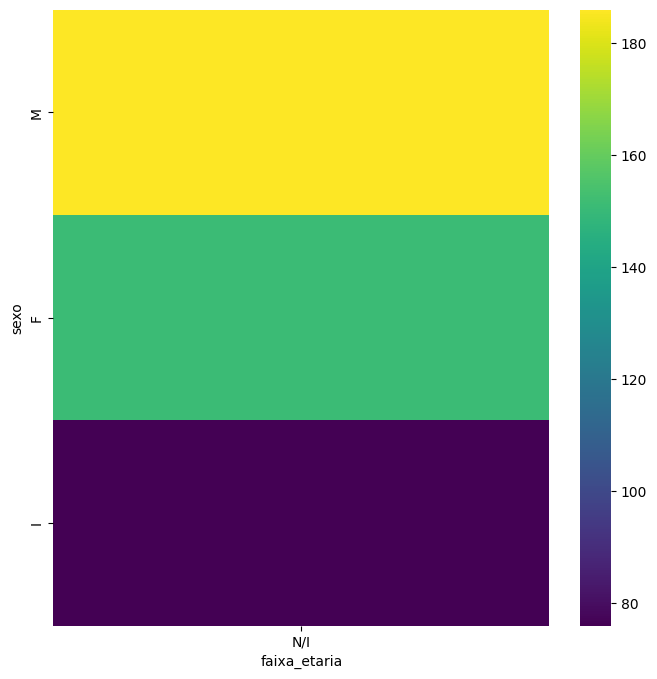

In [156]:
# @title faixa_etaria vs sexo

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sexo'].value_counts()
    for x_label, grp in obitos24_df.groupby('faixa_etaria')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('faixa_etaria')
_ = plt.ylabel('sexo')


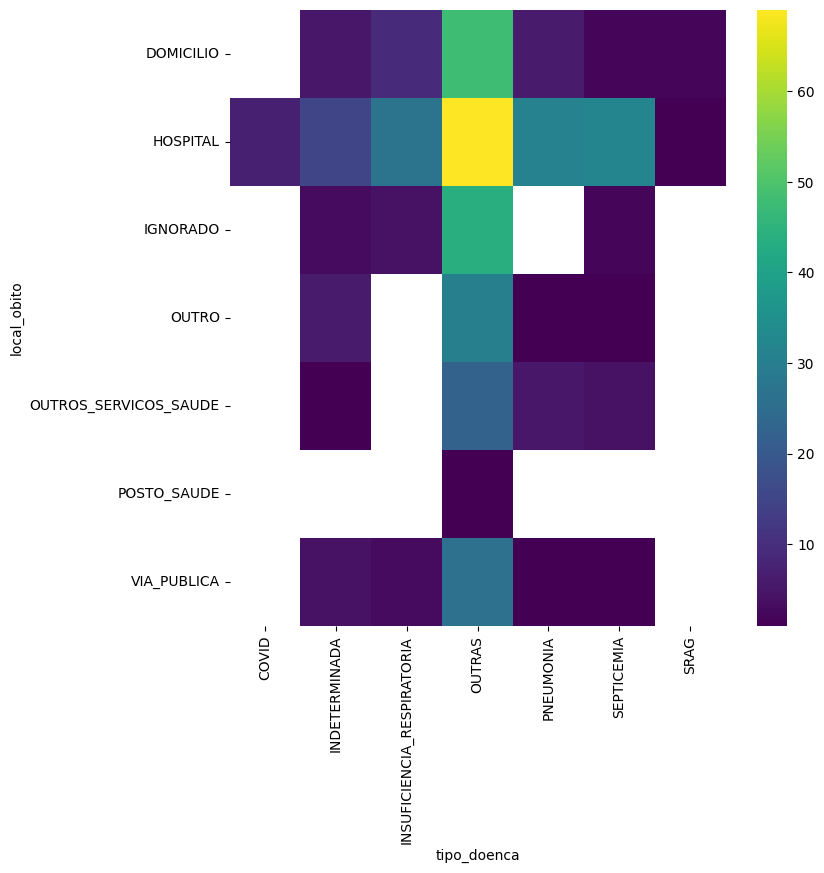

In [157]:
# @title tipo_doenca vs local_obito

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['local_obito'].value_counts()
    for x_label, grp in obitos24_df.groupby('tipo_doenca')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_doenca')
_ = plt.ylabel('local_obito')

# Testes de hipótese 2024

In [158]:
# Carregar os dados
obitos_24 = 'obitos-2024.csv'
data = pd.read_csv(obitos_24)


In [159]:
#Hipótese 1: Diferença no Número de Óbitos entre Sexos (Masculino vs Feminino)
# Filtrar os dados por sexo
masculino = data[data['sexo'] == 'M']['total']
feminino = data[data['sexo'] == 'F']['total']

# Teste t de Student para comparar as médias dos óbitos entre sexos
t_stat, p_val_sexo = ttest_ind(masculino, feminino, equal_var=False)

print(f"Estatística t: {t_stat}")
print(f"Valor-p: {p_val_sexo}")

Estatística t: -0.0065013253452271946
Valor-p: 0.9948166938156775


In [160]:
#Hipótese 2: Diferença no Número de Óbitos entre Faixas Etárias
# Agrupar os dados por faixa etária e extrair os valores de 'total' para cada grupo
faixa_etaria_groups = [group['total'].values for name, group in data.groupby('faixa_etaria')]

# Verificar se há pelo menos dois grupos antes de realizar a ANOVA
if len(faixa_etaria_groups) >= 2:
    # ANOVA para comparar as médias dos óbitos entre diferentes faixas etárias
    f_stat_faixa, p_val_faixa = f_oneway(*faixa_etaria_groups)

    print("ANOVA para diferença entre faixas etárias:")
    print(f"Estatística F: {f_stat_faixa}")
    print(f"Valor-p: {p_val_faixa}")
else:
    print("Não há grupos suficientes na coluna 'faixa_etaria' para realizar a ANOVA.")
    # Investigar por que há apenas um grupo na coluna 'faixa_etaria'
    print("Valores únicos na coluna 'faixa_etaria':", data['faixa_etaria'].unique())

Não há grupos suficientes na coluna 'faixa_etaria' para realizar a ANOVA.
Valores únicos na coluna 'faixa_etaria': [nan 'N/I']


In [161]:
#Hipótese 3: Diferença no Número de Óbitos entre Tipos de Doenças
# Agrupar os dados por tipo de doença
tipo_doenca_groups = [group['total'].values for name, group in data.groupby('tipo_doenca')]

# ANOVA para comparar as médias dos óbitos entre diferentes tipos de doenças
f_stat_doenca, p_val_doenca = f_oneway(*tipo_doenca_groups)

print("ANOVA para diferença entre tipos de doenças:")
print(f"Estatística F: {f_stat_doenca}")
print(f"Valor-p: {p_val_doenca}")

ANOVA para diferença entre tipos de doenças:
Estatística F: 4.339060719070022
Valor-p: 0.00029317710881376674
